In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
postings = pd.read_csv("fake_job_postings.csv")
postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
postings.shape

(17880, 18)

In [4]:
# percentage of fraudulent job postings in the dataset
postings.groupby("fraudulent").job_id.count()/postings.shape[0]

fraudulent
0    0.951566
1    0.048434
Name: job_id, dtype: float64

In [5]:
print(postings.employment_type.unique())
postings.employment_type.fillna("Missing", inplace=True)  # fill nan as Missing
print(postings.employment_type.unique())

['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']
['Other' 'Full-time' 'Missing' 'Part-time' 'Contract' 'Temporary']


In [6]:
# number of fraudulent job postings by employment type
data = postings.groupby(["employment_type", "fraudulent"]).job_id.count().reset_index()
data.columns = ["employment_type", "fraudulent", "count"]
data

,employment_type,fraudulent,count
0,Contract,0,1480
1,Contract,1,44
2,Full-time,0,11130
3,Full-time,1,490
4,Missing,0,3230
5,Missing,1,241
6,Other,0,212
7,Other,1,15
8,Part-time,0,723
9,Part-time,1,74


In [7]:
data["total_count"] = [val for val in postings.groupby("employment_type").job_id.count() for _ in range(2)]
data["percentage"] = 100*data["count"]/data["total_count"]
data

,employment_type,fraudulent,count,total_count,percentage
0,Contract,0,1480,1524,97.112861
1,Contract,1,44,1524,2.887139
2,Full-time,0,11130,11620,95.783133
3,Full-time,1,490,11620,4.216867
4,Missing,0,3230,3471,93.056756
5,Missing,1,241,3471,6.943244
6,Other,0,212,227,93.392070
7,Other,1,15,227,6.607930
8,Part-time,0,723,797,90.715182
9,Part-time,1,74,797,9.284818


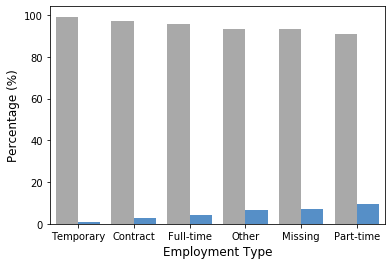

In [8]:
sns.barplot(x="employment_type", y="percentage", hue="fraudulent", data=data,
            palette=["darkgrey", "dodgerblue"], saturation=0.5,
            order=["Temporary", "Contract", "Full-time", "Other", "Missing", "Part-time"])
plt.xlabel("Employment Type", size=12)
plt.ylabel("Percentage (%)", size=12)
plt.legend("", frameon=False)
plt.savefig("employment_type.png", dpi=200, transparent=True)
plt.show()